In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
import requests
# import folium
from IPython.display import display
from api_keys import geoapify_key

# Study data files
data_file_path = "tedsa_puf_2019.csv"
nssats_data ="NSSATS_PUF_2019_CSV.csv"


data_file_df = pd.read_csv(data_file_path)
nssats_data_df = pd.read_csv(nssats_data)

data_file_df.head()


C:\Users\jimco\AppData\Local\Temp\ipykernel_31140\2215791180.py:18: DtypeWarning: Columns (9,10,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,75,76,77,78,84,86,87,136,148,149,150,151,152,153,155,181,184,191,197,200,206,207,209,210,212,213,215,216,218,221,228,230,231,233,238) have mixed types. Specify dtype option on import or set low_memory=False.
  nssats_data_df = pd.read_csv(nssats_data)


,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,1666221,2,27940,3,1,4,-9,0,3,...,0,0,0,0,0,0,9,4,0,3
1,2019,1570498,2,-9,3,1,7,-9,0,6,...,0,0,0,0,0,0,9,4,0,3
2,2019,1547352,2,27940,3,1,4,-9,3,2,...,0,0,0,0,0,0,9,4,0,1
3,2019,1510020,2,-9,3,1,7,-9,0,3,...,0,0,0,0,0,0,9,4,1,2
4,2019,1585912,2,-9,3,4,7,-9,1,1,...,0,0,0,0,0,0,9,4,0,3


In [92]:
nssats_pjt_df =nssats_data_df[["OWNERSHP", "STFIPS", "HOSPITAL", "ASSESSMENT", "TRANSITION", "EDUCATION", "SRVC91"]].copy()
nssats_pjt_df =nssats_pjt_df.rename(columns={'STFIPS': 'STATE'})
nssats_pjt_df.head()


,OWNERSHP,STATE,HOSPITAL,ASSESSMENT,TRANSITION,EDUCATION,SRVC91
0,6,2,0,7.0,3.0,9.0,1
1,2,2,0,5.0,3.0,10.0,0
2,2,2,0,6.0,3.0,8.0,1
3,2,2,0,8.0,4.0,9.0,1
4,2,2,0,6.0,4.0,8.0,1


In [93]:
filtered_df=data_file_df[["CASEID","PRIMPAY","HLTHINS","ETHNIC","AGE","RACE","PRIMINC","STFIPS","DIVISION", "SERVICES","DAYWAIT","PSOURCE","NOPRIOR"]].copy()
filtered_df.head()
filtered_df.columns

Index(['CASEID', 'PRIMPAY', 'HLTHINS', 'ETHNIC', 'AGE', 'RACE', 'PRIMINC',
       'STFIPS', 'DIVISION', 'SERVICES', 'DAYWAIT', 'PSOURCE', 'NOPRIOR'],
      dtype='object')

In [94]:




age_mapping = {1:"12-14 years",2:"15-17 years",3:"18-20 years",4:"21–24 years",
                5:"25–29 years",6: "30–34 years",7:"35–39 years",8:"40–44 years",
                9:"45–49 years",10:"50–54 years",11:"55–64 years",12:"65 years and older"}
  
state_mapping={1:'Alabama',
                2	:'Alaska',
                4	:'Arizona',
                5	:'Arkansas',
                6	:'California',
                8	:'Colorado',
                9	:'Connecticut',
                10	:'Delaware',
                11	:'District of Columbia',
                12	:'Florida',
                13	:'Georgia',
                15	:'Hawaii',
                16	:'Idaho',
                17	:'Illinois',
                18	:'Indiana',
                19	:'Iowa',
                20	:'Kansas',
                21	:'Kentucky',
                22	:'Louisiana',
                23	:'Maine',
                24	:'Maryland',
                25	:'Massachusetts',
                26	:'Michigan',
                27	:'Minnesota',
                28	:'Mississippi',
                29	:'Missouri',
                30	:'Montana',
                31	:'Nebraska',
                32	:'Nevada',
                33	:'New Hampshire',
                34	:'New Jersey',
                35   :'New Mexico',
                36   :'New York',
                37   :'North Carolina',
                38   :'North Dakota',
                39   :'Ohio',
                40   :'Oklahoma',
                42   :'Pennsylvania',
                44   :'Rhode Island',
                45   :'South Carolina',
                46   :'South Dakota',
                47   :'Tennessee',
                48   :'Texas',
                49   :'Utah',
                50   :'Vermont',
                51   :'Virginia',
                54   :'West Virginia',
                55   :'Wisconsin',
                56   :'Wyoming',
                72   :'Puerto Rico'                  
}  
daywait_mapping={ 0:'0',
                  1:'1-7',
                  2:'8-14',
                  3:'15-30',
                  4:'>30',
                  -9:'Missing'}
income_mapping={ 1: 'Wages/salary',
                 2:'Public assistance',
                 3:'Retirement/pension/disability',
                 4:'Other',
                 5:'None',
                 -9:'Missing'
}




 

primpay_mapping={1:'Self-pay',
                 2:'Private insurance (Blue Cross/Blue Shield, other health insurance,workers compensation)',
                 3:'Medicare',
                 4:'Medicaid',
                 5:'Other government payments',
                 6:'No charge (free, charity, special research, teaching)',
                 7:'Other',
                 -9:'Missing/unknown/not collected/invalid'
}
 

race_mapping={1:'Alaska Native (Aleut, Eskimo, Indian)',
              2:'American Indian (other than Alaska Native)',
              3:'Asian or Pacific Islander',
              4:'Black or African American 357,433 19.2%',
              5:'White',
              6:'Asian',
              7:'Other single races',
              8:'Two or more races',
              9:'Native Hawaiian or Other Pacific Islander',
              -9:'Missing/unknown/not collected/invalid'
}

referral_source_mapping={ 1:'Individual',
                          2:'Alcohol/drug use care provider',
                          3:'Other health care provider',
                          4:'School',
                          5:'Employer/EAP',
                          6:'Other community referral',
                          7:'Court/criminal justice referral/DUI/DWI',
                         -9:'Missing/unknown/not collected/invalid'
}
ethinicity_mapping={1:'Puerto Rican',
                    2:'Mexican',
                    3:'Cuban or other specific Hispanic',
                    4:'Not of Hispanic or Latino origin',
                    5:'Hispanic or Latino, specific origin not specified',
                    -9:' Missing/unknown/not collected/invalid'
}            
hlthins_mapping={1:'Private insurance, Blue Cross/Blue Shield, HMO',
                 2:'Medicaid',
                 3:'Medicare, other (e.g. TRICARE, CHAMPUS)',
                 4:'None',
                 -9:'Missing/unknown/not collected/invalid'
}
division_mapping={0:'U.S. territories',
                  1:'New England',
                  2:'Middle Atlantic',
                  3:'East North Central',
                  4:'West North Central',
                  5:'South Atlantic',
                  6:'East South Central',
                  7:'West South Central',
                  8:'Mountain',
                  9:'Pacific' 
}


services_mapping={1:'Detox,24-hour,hospital inpatient',
                  2:'Detox,24-hour,free-standing residential',
                  3:'Rehab/residential,hospital (non-detox)',
                  4:'Rehab/residential,short term (30 days or fewer)',
                  5:'Rehab/residential,long term (more than 30 days)',
                  6:'Ambulatory,intensive outpatient',
                  7:'Ambulatory,non-intensive outpatient',
                  8:'Ambulatory,detoxification'
}
no_prior_mapping={0:'No prior treatment episodes',
                  1:'One prior treatment episode',
                  2:'Two prior treatment episodes',
                  3:'Three prior treatment episodes',
                  4:'Four prior treatment episodes',
                  5:'Five or more prior treatment episodes',
                  -9:'Missing/unknown/not collected/invalid'
}
# Step 2: Convert the dictionary to a DataFrame
# Map TedsA in Filtered_df

filtered_df['AGE']= filtered_df['AGE'].map(age_mapping)
filtered_df['PRIMINC'] = filtered_df['PRIMINC'].map(income_mapping)
filtered_df['DAYWAIT'] = filtered_df['DAYWAIT'].map(daywait_mapping)
filtered_df['STFIPS'] = filtered_df['STFIPS'].map(state_mapping)
filtered_df['PRIMPAY'] = filtered_df['PRIMPAY'].map(primpay_mapping)
filtered_df['RACE'] = filtered_df['RACE'].map(race_mapping)
filtered_df['PSOURCE'] = filtered_df['PSOURCE'].map(referral_source_mapping)
filtered_df['ETHNIC'] = filtered_df['ETHNIC'].map(ethinicity_mapping)
filtered_df['HLTHINS'] = filtered_df['HLTHINS'].map(hlthins_mapping)
filtered_df['DIVISION'] = filtered_df['DIVISION'].map(division_mapping)
filtered_df['SERVICES'] = filtered_df['SERVICES'].map(services_mapping)
filtered_df['NOPRIOR'] = filtered_df['NOPRIOR'].map(no_prior_mapping)
filtered_df.head()


,CASEID,PRIMPAY,HLTHINS,ETHNIC,AGE,RACE,PRIMINC,STFIPS,DIVISION,SERVICES,DAYWAIT,PSOURCE,NOPRIOR
0,1666221,Medicaid,Medicaid,Not of Hispanic or Latino origin,18-20 years,Two or more races,Other,Alaska,Pacific,"Rehab/residential,short term (30 days or fewer)",0,Other health care provider,No prior treatment episodes
1,1570498,Self-pay,None,Cuban or other specific Hispanic,35–39 years,White,None,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Other community referral,No prior treatment episodes
2,1547352,Medicaid,Medicaid,Not of Hispanic or Latino origin,25–29 years,American Indian (other than Alaska Native),None,Alaska,Pacific,"Rehab/residential,short term (30 days or fewer)",0,Alcohol/drug use care provider,Three prior treatment episodes
3,1510020,Medicaid,Medicaid,Not of Hispanic or Latino origin,25–29 years,Two or more races,None,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Other health care provider,No prior treatment episodes
4,1585912,Other,None,Not of Hispanic or Latino origin,25–29 years,"Alaska Native (Aleut, Eskimo, Indian)",Other,Alaska,Pacific,"Ambulatory,non-intensive outpatient",0,Individual,One prior treatment episode


In [95]:
nssats_data_df["HOSPITAL"].dtype

dtype('O')

In [96]:
OWNERSHP_map = {1:'Private for-profit organization',
                2:'Private non-profit organization',
                3:'State government',
                4:'Local, county, or community government',
                5:'Tribal government',
                6:'Federal government'
}
hospital_map = {"M":'Missing',
                "0":'No',
                "1":'Yes'}


assessment_map =  {0:'0 assessment services offered',
                   1: '1 assessment service offered',
                   2: '2 assessment services offered',
                   3: '3 assessment services offered',
                   4: '4 assessment services offered',
                   5: '5 assessment services offered',
                   6: '6 assessment services offered',
                   7: '7 assessment services offered',
                   8: '8 assessment services offered'
}
tranition_map = {'.': 'Logical skip',
                 0: '0 transitional services offered',
                 1:	'1 transitional service offered',
                 2:	'2 transitional services offered',
                 3:	'3 transitional services offered',
                 4:	'4 transitional services offered',
}
education_map = {'.': 'Logical skip',
                 0: '0 education and counseling services offered',
                 1: '1 education and counseling service offered',
                 2:	'2 education and counseling services offered',
                 3: '3 education and counseling services offered',
                 4:	'4 education and counseling services offered',
                 5: '5 education and counseling services offered',
                 6: '6 education and counseling services offered',
                 7:	'7 education and counseling services offered',
                 8:	'8 education and counseling services offered',
                 9:	'9 education and counseling services offered',
                 10: '10 education and counseling services offered'
}

srvc91_map = {'.': 'Logical skip',
              '0': '0 other services offered',
              '1': '1 other service offered',
              '2': '2 other services offered',
              '3': '3 other services offered'
}

#map values to Lables NSSATS

nssats_pjt_df['STATE'] = nssats_pjt_df['STATE'].map(state_mapping)
nssats_pjt_df['HOSPITAL'] = nssats_pjt_df['HOSPITAL'].map(hospital_map)
nssats_pjt_df['ASSESSMENT'] = nssats_pjt_df['ASSESSMENT'].map(assessment_map)
nssats_pjt_df['TRANSITION'] = nssats_pjt_df['TRANSITION'].map(tranition_map)
nssats_pjt_df['EDUCATION'] = nssats_pjt_df['EDUCATION'].map(education_map )
nssats_pjt_df['SRVC91'] = nssats_pjt_df['SRVC91'].map(srvc91_map )

nssats_pjt_df.head()

,OWNERSHP,STATE,HOSPITAL,ASSESSMENT,TRANSITION,EDUCATION,SRVC91
0,6,Alaska,No,7 assessment services offered,3 transitional services offered,9 education and counseling services offered,1 other service offered
1,2,Alaska,No,5 assessment services offered,3 transitional services offered,10 education and counseling services offered,0 other services offered
2,2,Alaska,No,6 assessment services offered,3 transitional services offered,8 education and counseling services offered,1 other service offered
3,2,Alaska,No,8 assessment services offered,4 transitional services offered,9 education and counseling services offered,1 other service offered
4,2,Alaska,No,6 assessment services offered,4 transitional services offered,8 education and counseling services offered,1 other service offered


In [97]:
#teratment access analysis
total_cases_per_state = filtered_df.groupby('STFIPS')['CASEID'].count().reset_index(name='Total Cases')


# Rename the column for clarity
total_cases_per_state.head(10)

,STFIPS,Total Cases
0,Alabama,17555
1,Alaska,6661
2,Arizona,136531
3,Arkansas,13784
4,California,155345
5,Colorado,82096
6,Connecticut,65103
7,Delaware,16189
8,District of Columbia,5454
9,Florida,63277


In [98]:
wait_time_df = filtered_df[filtered_df['DAYWAIT']=='>30']
wait_time_df
long_wait_cases_count_per_state = wait_time_df.groupby('STFIPS')['CASEID'].count().reset_index(name='Total Cases')


# Rename the column for clarity
long_wait_cases_count_per_state.head(10)

,STFIPS,Total Cases
0,Alaska,5
1,Arkansas,655
2,California,1337
3,Colorado,2630
4,Connecticut,58
5,Delaware,8
6,District of Columbia,2
7,Florida,1650
8,Hawaii,76
9,Illinois,289


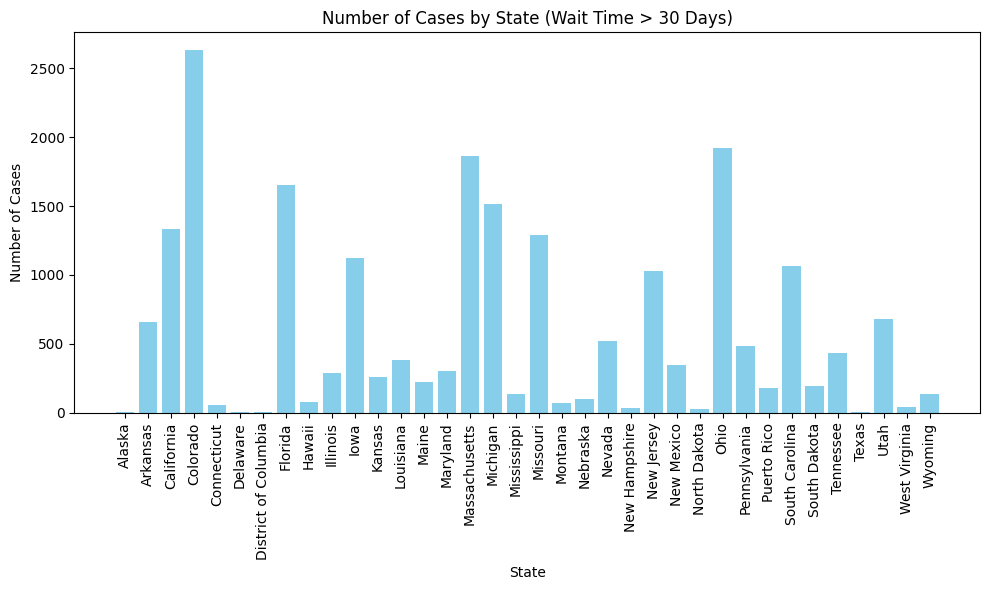

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(long_wait_cases_count_per_state['STFIPS'], long_wait_cases_count_per_state['Total Cases'], color='skyblue')

# Adding titles and labels
plt.title('Number of Cases by State (Wait Time > 30 Days)')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.tight_layout()  # Adjust layout to make room for labels

# Show the plot
plt.show()

In [100]:
state_services = filtered_df.groupby('STFIPS')['SERVICES'].nunique().reset_index()
state_services.columns = ['STFIPS', 'Number_of_Unique_Services']
print("Services by State:")
print(state_services)
limited_options_states = state_services[state_services['Number_of_Unique_Services'] < 5]

Services by State:
                  STFIPS  Number_of_Unique_Services
0                Alabama                          5
1                 Alaska                          5
2                Arizona                          5
3               Arkansas                          6
4             California                          6
5               Colorado                          8
6            Connecticut                          8
7               Delaware                          5
8   District of Columbia                          6
9                Florida                          7
10               Georgia                          6
11                Hawaii                          4
12                 Idaho                          5
13              Illinois                          5
14               Indiana                          8
15                  Iowa                          8
16                Kansas                          7
17              Kentucky                     

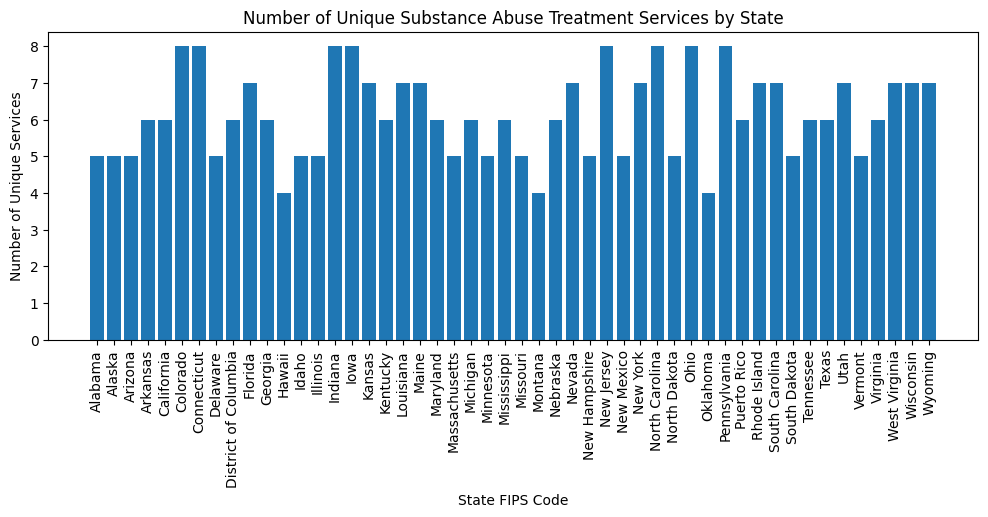

In [101]:


# Plotting services by state
plt.figure(figsize=(12, 4))
plt.bar(state_services['STFIPS'].astype(str), state_services['Number_of_Unique_Services'])
plt.title('Number of Unique Substance Abuse Treatment Services by State')
plt.xlabel('State FIPS Code')
plt.ylabel('Number of Unique Services')
plt.xticks(rotation=90)
plt.show()



In [102]:
#States that have limited number of services threshold value we use is less than 5
limited_options_states = state_services[state_services['Number_of_Unique_Services'] < 5]
limited_options_states 

,STFIPS,Number_of_Unique_Services
11,Hawaii,4
26,Montana,4
36,Oklahoma,4


In [103]:
#Group the data by DIVISION and the new service category column. Count the number of available services in each category for each region
services_mapping = {
    'Detox,24-hour,hospital inpatient': 'Inpatient Treatment',
    'Detox,24-hour,free-standing residential': 'Detoxification Services',
    'Rehab/residential,hospital (non-detox)': 'Inpatient Treatment',
    'Rehab/residential,short term (30 days or fewer)': 'Rehabilitation Services',
    'Rehab/residential,long term (more than 30 days)': 'Rehabilitation Services',
    'Ambulatory,intensive outpatient': 'Outpatient Treatment',
    'Ambulatory,non-intensive outpatient': 'Outpatient Treatment',
    'Ambulatory,detoxification': 'Outpatient Treatment'
}

# Map the services to categories
filtered_df['Service Category'] = filtered_df['SERVICES'].map(services_mapping)

# Group by division and Service Category, then count the number of services
service_counts = filtered_df.groupby(['DIVISION', 'Service Category']).size().reset_index(name='Count')

# Display the results
print(service_counts)


              DIVISION         Service Category   Count
0   East North Central  Detoxification Services   32881
1   East North Central      Inpatient Treatment     786
2   East North Central     Outpatient Treatment  138027
3   East North Central  Rehabilitation Services   38358
4   East South Central  Detoxification Services   11487
5   East South Central      Inpatient Treatment     743
6   East South Central     Outpatient Treatment   40218
7   East South Central  Rehabilitation Services   14772
8      Middle Atlantic  Detoxification Services   53818
9      Middle Atlantic      Inpatient Treatment   32544
10     Middle Atlantic     Outpatient Treatment  217814
11     Middle Atlantic  Rehabilitation Services   94984
12            Mountain  Detoxification Services   47759
13            Mountain      Inpatient Treatment    3724
14            Mountain     Outpatient Treatment  197131
15            Mountain  Rehabilitation Services   17100
16         New England  Detoxification Services 

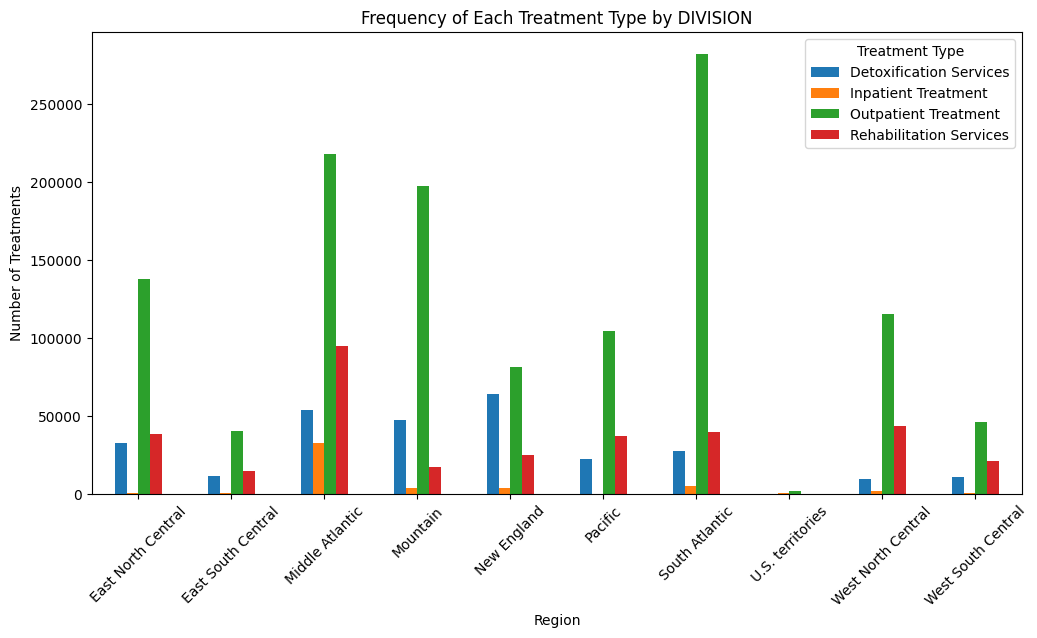

In [104]:
treatment_counts = filtered_df.groupby(['DIVISION', 'Service Category']).size().unstack()
treatment_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Each Treatment Type by DIVISION')
plt.ylabel('Number of Treatments')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Treatment Type')
plt.show()

HLTHINS
Missing/unknown/not collected/invalid             885443
Medicaid                                          550598
None                                              294845
Medicare, other (e.g. TRICARE, CHAMPUS)            82003
Private insurance, Blue Cross/Blue Shield, HMO     76866
Name: count, dtype: int64
Service Category                                Detoxification Services  \
HLTHINS                                                                   
Medicaid                                                       0.142674   
Medicare, other (e.g. TRICARE, CHAMPUS)                        0.144519   
Missing/unknown/not collected/invalid                          0.132741   
None                                                           0.208262   
Private insurance, Blue Cross/Blue Shield, HMO                 0.161398   

Service Category                                Inpatient Treatment  \
HLTHINS                                                               
Medicaid     

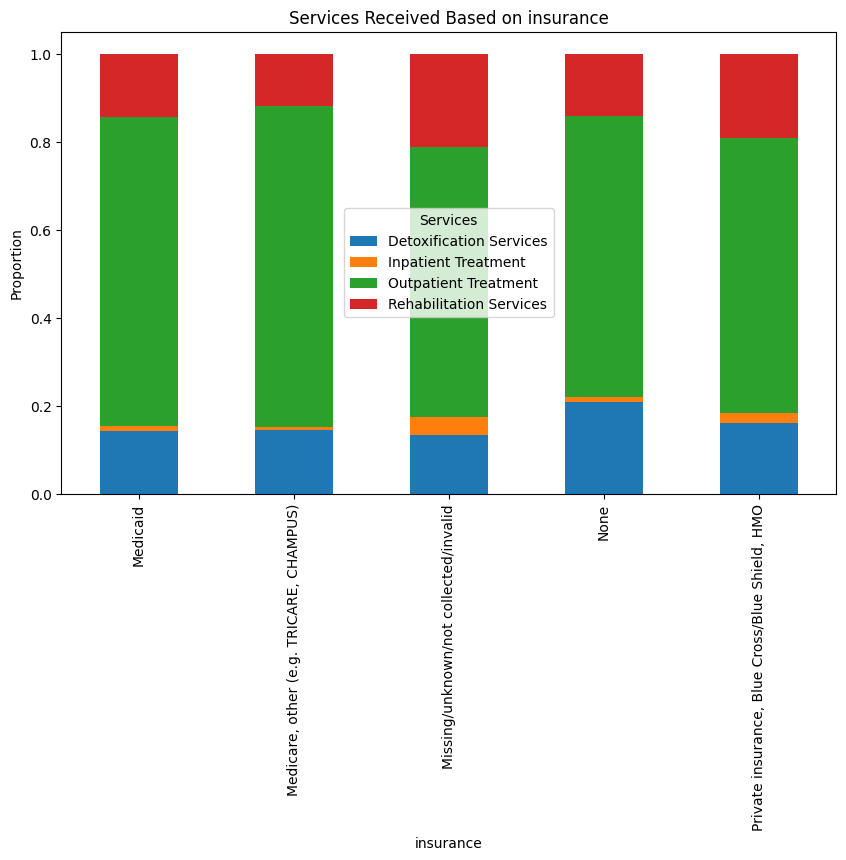

In [105]:
# Check the unique values in the  HLTHINS columns
print(filtered_df['HLTHINS'].value_counts())



# Analyze the number of services received based on insurance
services_by_insurance = filtered_df.groupby('HLTHINS')['Service Category'].value_counts(normalize=True).unstack()
print(services_by_insurance)
# Visualize services received based on health insurance
services_by_insurance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Services Received Based on insurance')
plt.xlabel('insurance')
plt.ylabel('Proportion')
plt.legend(title='Services')
plt.show()

#This analysis will help you understand the impact  health insurance on treatment outcomes or service utilization, even in the absence of a specific treatment access column

## Summary Statistics

## Correlation and Regression